In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Leitura e apresentação dos Dataset. Os quatro atributos independentes são valores contínuos que representam:
*   Sepal.Length - Comprimento da Sépala
*   Sepal.Width - Largura da Sépala
*   Petal.Length - Comprimento da Pétala
*   Petal.Width - Largura da Sépala

O último atributo representa a espécie da planta, que pode ser setosa (0), versicolor (1) ou virginica (2).

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
print ('Formato dos dados independentes: ',X_iris.shape)
print ('Formato dos resultados (classe): ',y_iris.shape)


Formato dos dados independentes:  (150, 4)
Formato dos resultados (classe):  (150,)


In [ ]:
X_iris[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [ ]:
y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Exclui as colunas relacionadas às pétalas para criar um modelo com base apenas nos dois primeiros atributos.

In [ ]:
X = X_iris[:,:2]
y = y_iris

print(X[0:10])

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]]


Divide o dataset em dois conjuntos, um para treinamento e outro para teste.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

print('Formato dos dados de treinamento')
print (X_train.shape, y_train.shape)

print('Formato dos dados de teste')
print (X_test.shape, y_test.shape)


Formato dos dados de treinamento
(112, 2) (112,)
Formato dos dados de teste
(38, 2) (38,)


Realiza a transformação dos dados usando a normalização padrão (Z-Score).

In [ ]:
from sklearn.preprocessing import StandardScaler

tranform = StandardScaler()

X_train = tranform.fit_transform(X_train)
X_test = tranform.fit_transform(X_test)

print(X_train[0:10])

[[-0.91090798 -1.59775374]
 [-1.0271058   0.08448757]
 [ 0.59966379 -1.59775374]
 [ 0.01867465 -0.96691325]
 [ 0.48346596 -0.33607276]
 [-1.25950146  0.29476773]
 [-1.37569929  0.71532806]
 [-0.79471015 -1.17719341]
 [-1.14330363  0.71532806]
 [ 2.45882905  1.55644871]]


Desenha os pontos com o comprimento (eixo x) e a largura da sépala (eixo y), usando cores diferentes para cada tipo de flor:
1.   setosa (0) - vermelho
2.   versicolor (1) - amarelo
3.   virginica (2) - azul


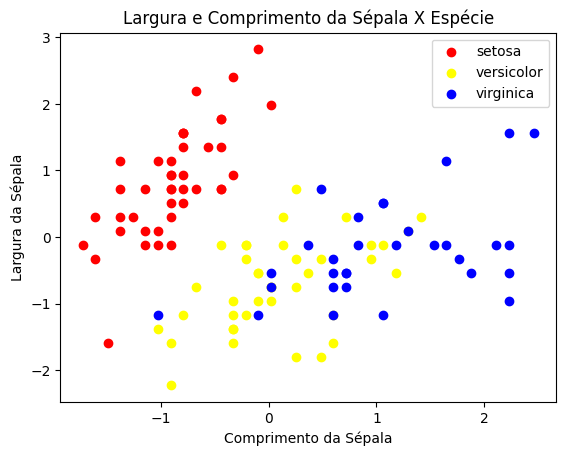

In [ ]:
px = X_train[:, 0][y_train == 0]
py = X_train[:, 1][y_train == 0]
plt.scatter(px, py, c='red')

px = X_train[:, 0][y_train == 1]
py = X_train[:, 1][y_train == 1]
plt.scatter(px, py, c='yellow')

px = X_train[:, 0][y_train == 2]
py = X_train[:, 1][y_train == 2]
plt.scatter(px, py, c='blue')

plt.title('Largura e Comprimento da Sépala X Espécie')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.legend(iris.target_names)
plt.show()

Cria e treina um modelo do tipo **Perceptron**

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

modelo = Perceptron(random_state=0)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print('Coeficientes w1 e w2 das três retas')
print (modelo.coef_)
print('Coeficiente w0 das três retas')
print (modelo.intercept_)
print('Acurácia do modelo')
print(acc)

Coeficientes w1 e w2 das três retas
[[-3.98807546  2.35438683]
 [-1.18065293 -1.13588838]
 [ 1.93801378  0.2515852 ]]
Coeficiente w0 das três retas
[-2. -1. -2.]
Acurácia do modelo
0.6842105263157895


Apresenta os gráficos com as três retas geradas pelos coeficientes acima

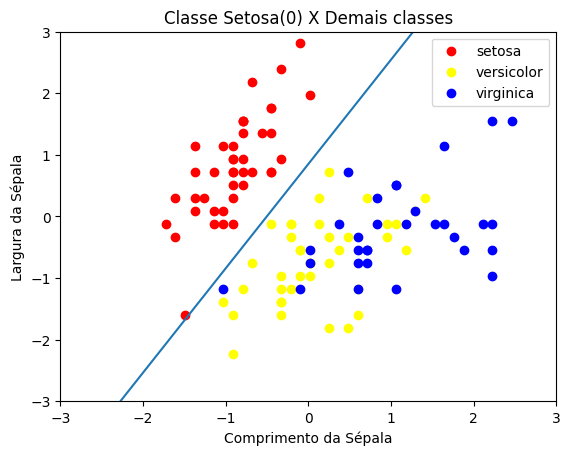

In [ ]:
xs = np.arange(-3,3,0.5)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

px = X_train[:, 0][y_train == 0]
py = X_train[:, 1][y_train == 0]
plt.scatter(px, py, c='red')

px = X_train[:, 0][y_train == 1]
py = X_train[:, 1][y_train == 1]
plt.scatter(px, py, c='yellow')

px = X_train[:, 0][y_train == 2]
py = X_train[:, 1][y_train == 2]
plt.scatter(px, py, c='blue')

plt.title('Classe Setosa(0) X Demais classes')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.legend(iris.target_names)

ys = (-modelo.intercept_[0]-xs*modelo.coef_[0,0])/modelo.coef_[0,1]
plt.plot(xs,ys)

plt.show()

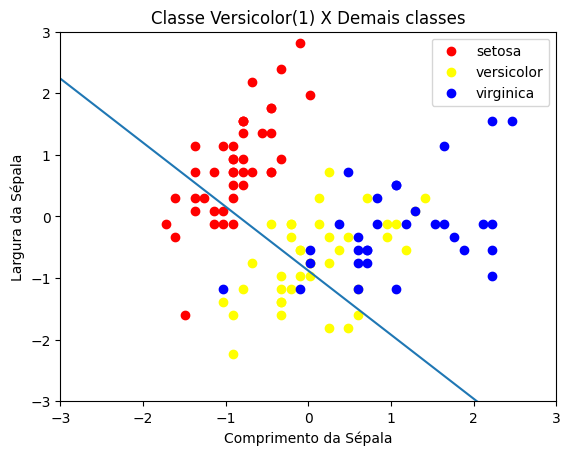

In [ ]:
xs = np.arange(-3,3,0.5)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

px = X_train[:, 0][y_train == 0]
py = X_train[:, 1][y_train == 0]
plt.scatter(px, py, c='red')

px = X_train[:, 0][y_train == 1]
py = X_train[:, 1][y_train == 1]
plt.scatter(px, py, c='yellow')

px = X_train[:, 0][y_train == 2]
py = X_train[:, 1][y_train == 2]
plt.scatter(px, py, c='blue')

plt.title('Classe Versicolor(1) X Demais classes')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.legend(iris.target_names)

ys = (-modelo.intercept_[1]-xs*modelo.coef_[1,0])/modelo.coef_[1,1]
plt.plot(xs,ys)

plt.show()

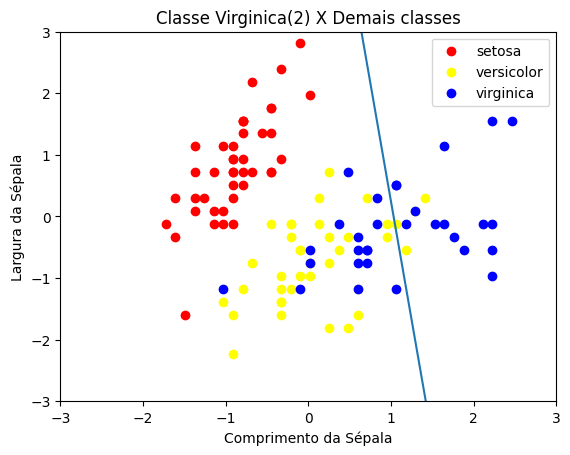

In [ ]:
xs = np.arange(-3,3,0.5)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

px = X_train[:, 0][y_train == 0]
py = X_train[:, 1][y_train == 0]
plt.scatter(px, py, c='red')

px = X_train[:, 0][y_train == 1]
py = X_train[:, 1][y_train == 1]
plt.scatter(px, py, c='yellow')

px = X_train[:, 0][y_train == 2]
py = X_train[:, 1][y_train == 2]
plt.scatter(px, py, c='blue')

plt.title('Classe Virginica(2) X Demais classes')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.legend(iris.target_names)


ys = (-modelo.intercept_[2]-xs*modelo.coef_[2,0])/modelo.coef_[2,1]
plt.plot(xs,ys)

plt.show()

In [ ]:
# create the linear model classifier
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
# fit (train) the classifier
clf.fit(X_train, y_train)
# print learned coeficients
print (clf.coef_)
print (clf.intercept_)

[[-26.54635195  12.45631349]
 [  1.59841155   0.45070798]
 [  9.57599244   0.49512636]]
[-16.69319174  -6.98649869  -5.43330821]


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

modelo = SGDClassifier(loss='hinge',random_state=0)

modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print('Coeficientes w1 e w2 das três retas')
print (modelo.coef_)
print('Coeficiente w0 das três retas')
print (modelo.intercept_)
print('Acurácia do modelo')
print(acc)

Coeficientes w1 e w2 das três retas
[[-31.98123334  16.07261747]
 [ -1.35560367  -2.86206716]
 [  1.58102389  -5.48224665]]
Coeficiente w0 das três retas
[-18.95714292  -3.08702462  -0.39459664]
Acurácia do modelo
0.7105263157894737


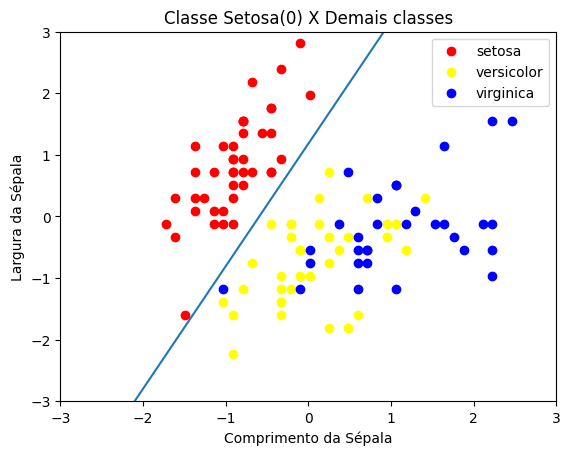

In [ ]:
xs = np.arange(-3,3,0.5)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

px = X_train[:, 0][y_train == 0]
py = X_train[:, 1][y_train == 0]
plt.scatter(px, py, c='red')

px = X_train[:, 0][y_train == 1]
py = X_train[:, 1][y_train == 1]
plt.scatter(px, py, c='yellow')

px = X_train[:, 0][y_train == 2]
py = X_train[:, 1][y_train == 2]
plt.scatter(px, py, c='blue')

plt.title('Classe Setosa(0) X Demais classes')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.legend(iris.target_names)

ys = (-modelo.intercept_[0]-xs*modelo.coef_[0,0])/modelo.coef_[0,1]
plt.plot(xs,ys)

plt.show()

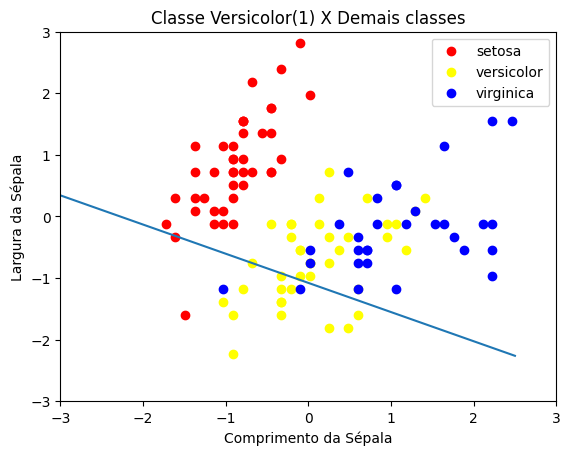

In [ ]:
xs = np.arange(-3,3,0.5)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

px = X_train[:, 0][y_train == 0]
py = X_train[:, 1][y_train == 0]
plt.scatter(px, py, c='red')

px = X_train[:, 0][y_train == 1]
py = X_train[:, 1][y_train == 1]
plt.scatter(px, py, c='yellow')

px = X_train[:, 0][y_train == 2]
py = X_train[:, 1][y_train == 2]
plt.scatter(px, py, c='blue')

plt.title('Classe Versicolor(1) X Demais classes')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.legend(iris.target_names)

ys = (-modelo.intercept_[1]-xs*modelo.coef_[1,0])/modelo.coef_[1,1]
plt.plot(xs,ys)

plt.show()

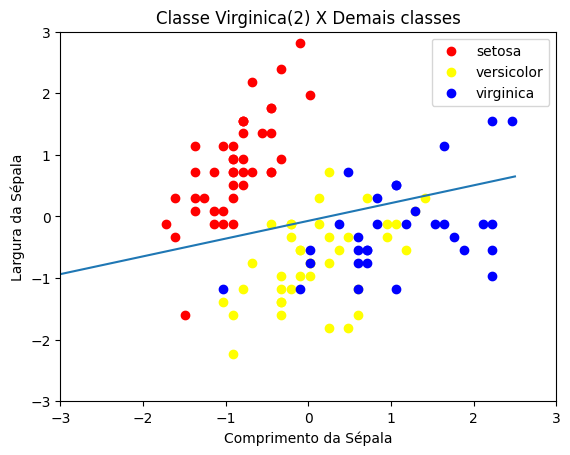

In [ ]:
xs = np.arange(-3,3,0.5)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

px = X_train[:, 0][y_train == 0]
py = X_train[:, 1][y_train == 0]
plt.scatter(px, py, c='red')

px = X_train[:, 0][y_train == 1]
py = X_train[:, 1][y_train == 1]
plt.scatter(px, py, c='yellow')

px = X_train[:, 0][y_train == 2]
py = X_train[:, 1][y_train == 2]
plt.scatter(px, py, c='blue')

plt.title('Classe Virginica(2) X Demais classes')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.legend(iris.target_names)

ys = (-modelo.intercept_[2]-xs*modelo.coef_[2,0])/modelo.coef_[2,1]
plt.plot(xs,ys)
plt.show()